### Прямоугольные антенны, диаметр 0.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_excel('../data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 11) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник {wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('l, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('L, мкГн')
    ax.set_xlabel('N')
    return ax, res

In [3]:
def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник {wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('L, мкГн')
    ax.set_xlabel('d, мм')
    return ax, res

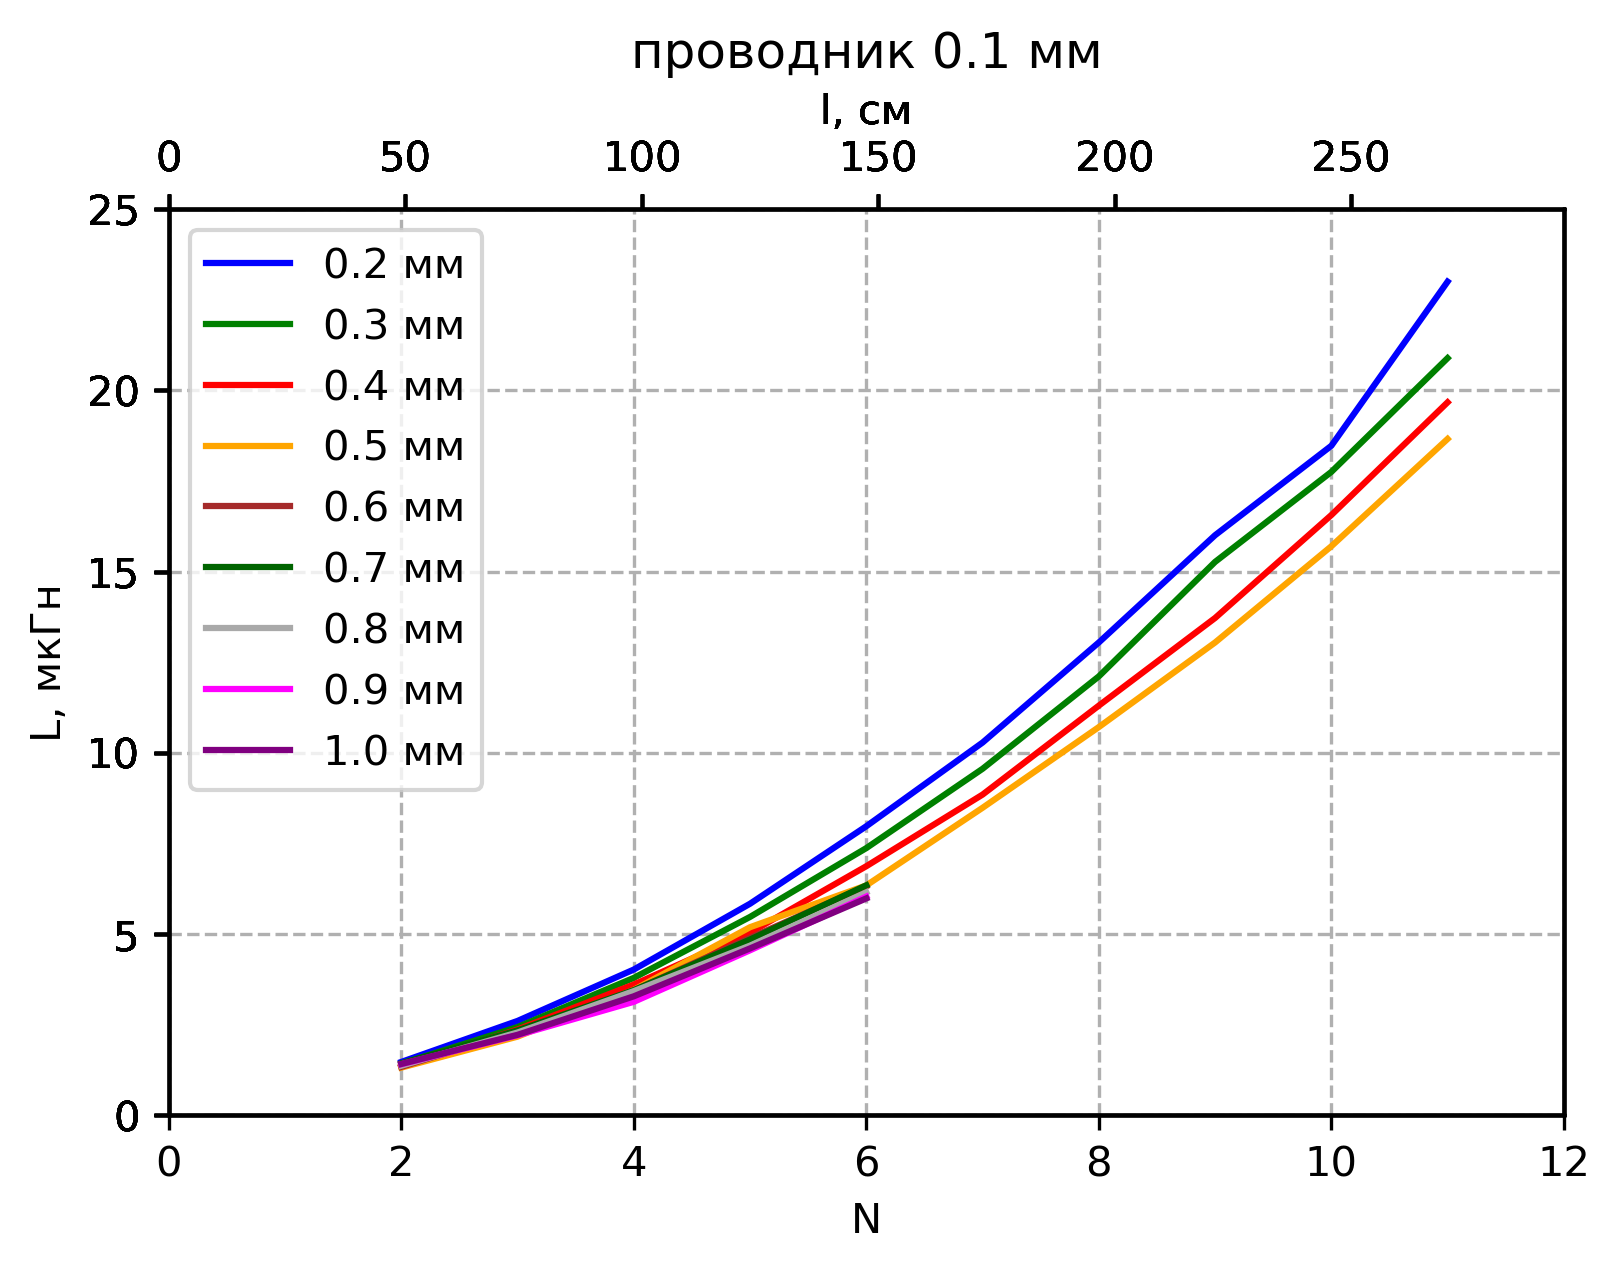

In [4]:
ax, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['green', 'red', 'orange', 'brown', 'darkgreen', 'darkgrey', 'magenta', 'purple']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax)

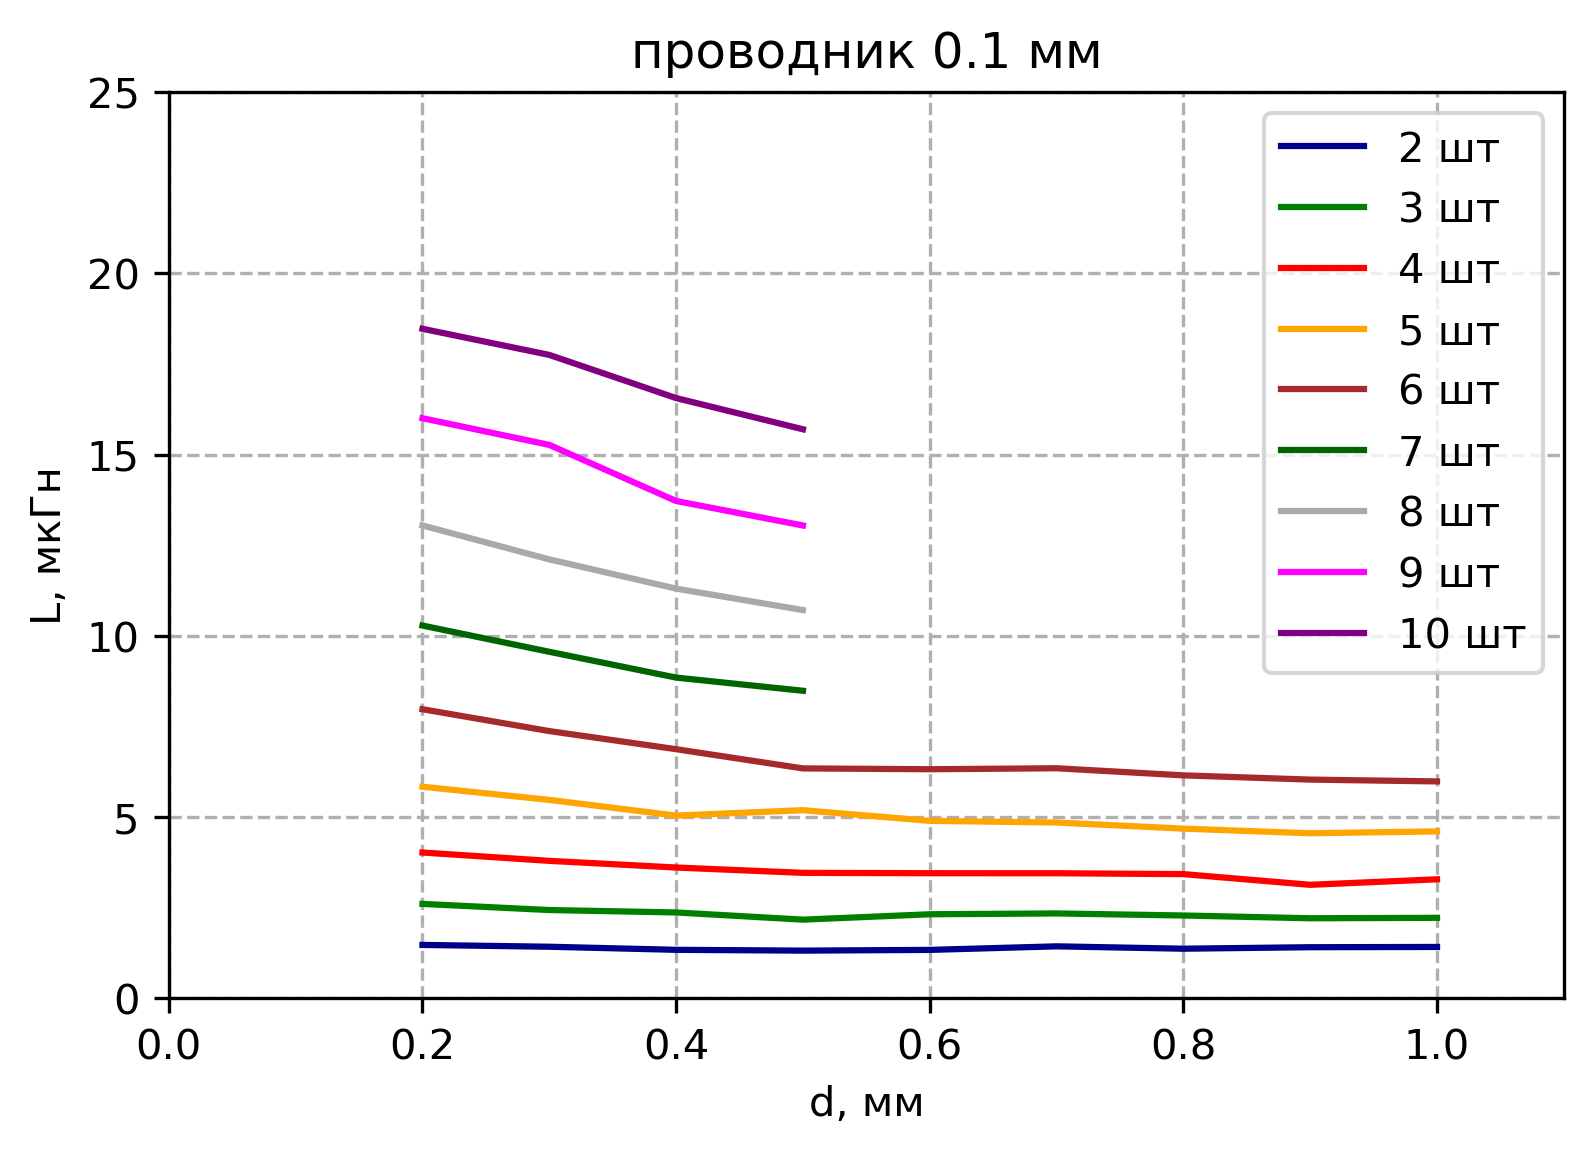

In [5]:
ax, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['green', 'red', 'orange', 'brown', 'darkgreen', 'darkgrey', 'magenta', 'purple']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, ax=ax, color=col)